<a href="https://colab.research.google.com/github/blackipod/hello-world/blob/main/INV6001_Assignment_4_3_Hacker_Stats_LIMFRANCES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/amitkaps/hackermath/blob/master/Module_2g_HackerStats.ipynb 

A shoe company launches a premium shoe model SC-X01. The sales for the first month (in USD) are given below:

In [1]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
sales_1 = np.array([54, 69, 50, 57, 70, 69, 52, 46, 60, 42, 57, 64, 58, 60, 40, 63, 60, 70, 57, 71, 66, 67, 68, 42, 46, 50, 48, 65, 45, 45])

In [3]:
np.mean(sales_1)

57.03333333333333

In [4]:
#Generates a random sample from a given 1-D array 
?np.random.choice

In [12]:
#sample_1 = 1D array
#30 = random numbers
sample_1 = np.random.choice(sales_1, 30)

sample_1

array([58, 57, 60, 45, 57, 50, 64, 70, 50, 71, 50, 45, 64, 46, 60, 48, 54,
       57, 69, 50, 69, 48, 68, 57, 46, 63, 67, 70, 48, 42])

In [13]:
np.mean(sample_1)

56.766666666666666

In [18]:
#arguments:
#input - input array for which bootstrap sample has to be generated
#num_samples - number of times it has to be generated aka number of values
#output: bootstrap_mean : This returns the mean of each of the bootstrap sample as a numpy array
def bootstrap_sample_mean(input, num_samples):
  bootstrap_mean = np.zeros([num_samples, 1])

  for i in np.arange(num_samples):
    sample = np.random.choice(input, input.shape[0])
    bootstrap_mean[i] = np.mean(sample)
  
  return bootstrap_mean

In [22]:
bootstrap_mean = bootstrap_sample_mean(sales_1, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


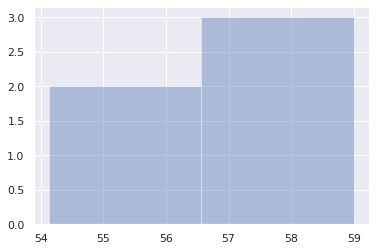

In [23]:
sns.distplot(bootstrap_mean, kde=False)

In [24]:
np.std(bootstrap_mean)

1.7414425693149402

In [25]:
bootstrap_mean = bootstrap_sample_mean(sales_1, 100000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


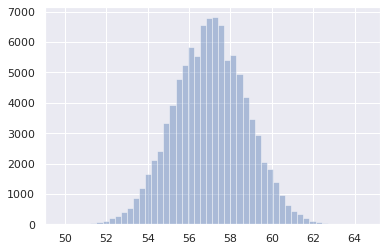

In [26]:
sns.distplot(bootstrap_mean, kde=False)

In [27]:
np.mean(bootstrap_mean)

57.02255

In [28]:
np.std(bootstrap_mean)

1.7614702973967828

In [29]:
from scipy import stats
stats.sem(sales_1)

1.7885223679161515

#A/B Testing
The shoe company, after a month of sales, got endorsed by the current MVP of NBA.

The sales for the second month after lunch, and the first month after endorsement is as follows:

In [30]:
sales_2 = np.array([64, 60, 52, 51, 69, 71, 71, 68, 56, 63, 71, 61, 63, 67, 60, 62, 72,
       42, 54, 45, 59, 44, 64, 63, 59, 40, 55, 61, 57, 63])

In [31]:
np.mean(sales_2)

59.56666666666667

In [32]:
# The difference between the two means:
shoe_sales_diff = np.mean(sales_2) - np.mean(sales_1)
shoe_sales_diff

2.5333333333333385

**#####Sales improved by 2.53%. Question is, is it statistically significant?**

We will assign label to *sales before* endorsement as 1 and *sales after* endorsement as 2<br><br>
The observed difference is given in the above cell<br><br>
We will then randomly shuffle the labels between the two groups<br><br>
Compute the mean between the two groups.<br><br>
Find the % of times when the difference between the means computed is greater than what we observed above<br><br>
If the % of times is less than x%, we would make the call that the improvements are real (generally x is taken as 5)

In [39]:
#np.array parameters: array-like parameter, dtype, order, subok, ndmin, like
#np.repeat parameters: input, repeats, axis

#get sales_1 dataset
sales_label_1 = np.array([sales_1, np.repeat(1,sales_1.shape[0])])

#get sales_2 dataset
sales_label_2 = np.array([sales_2, np.repeat(2,sales_2.shape[0])])

In [40]:
#combine

shoe_sales = np.concatenate((sales_label_1, sales_label_2), axis=0)

In [41]:
#shuffle labels
experiment_label = np.random.randint(1, 3, shoe_sales.shape[0])

In [42]:
experiment_label

array([1, 2, 2, 2])

In [43]:
#create experiment data combining actual sales with shuffled label

experiment_data = np.transpose(np.array([shoe_sales[:,0], experiment_label]))

In [44]:
experiment_data

array([[54,  1],
       [ 1,  2],
       [64,  2],
       [ 2,  2]])

In [45]:
experiment_diff_mean = experiment_data[experiment_data[:,1]==2].mean() - experiment_data[experiment_data[:,1]==1].mean()

In [46]:
experiment_diff_mean

-15.333333333333334

In [47]:
def mean_diff_shuffle_labels(input, num_times):
  mean_diff_shuffle_mean = np.zeros([num_times, 1])

  for i in np.arange(num_times):
    experiment_label = np.random.randint(1, 3, shoe_sales.shape[0])
    experiment_data = np.transpose(np.array([shoe_sales[:,0], experiment_label]))
    experiment_diff_mean = experiment_data[experiment_data[:,1]==2].mean() - experiment_data[experiment_data[:,1]==1].mean()

    mean_diff_shuffle_mean[i] = experiment_diff_mean
  
  return mean_diff_shuffle_mean

In [48]:
shoe_mean_diff_shuffle = mean_diff_shuffle_labels(shoe_sales,10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


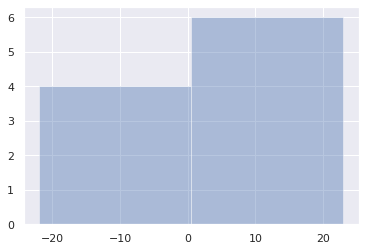

In [49]:
sns.distplot(shoe_mean_diff_shuffle, kde = False)

In [50]:
print("Data: Difference in mean greater than observed:", \
        shoe_mean_diff_shuffle[shoe_mean_diff_shuffle>shoe_sales_diff])

Data: Difference in mean greater than observed: [ 3.25       19.33333333 20.         23.          3.25       23.        ]


In [51]:
print("Number of times diff in mean greater than observed:", \
            shoe_mean_diff_shuffle[shoe_mean_diff_shuffle>shoe_sales_diff].shape[0])

Number of times diff in mean greater than observed: 6


In [52]:
print("% of times diff in mean greater than observed:", \
        shoe_mean_diff_shuffle[shoe_mean_diff_shuffle>shoe_sales_diff].shape[0]/float(shoe_mean_diff_shuffle.shape[0])*100)

% of times diff in mean greater than observed: 60.0


In [53]:
shoe_mean_diff_shuffle = mean_diff_shuffle_labels(shoe_sales, 100000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


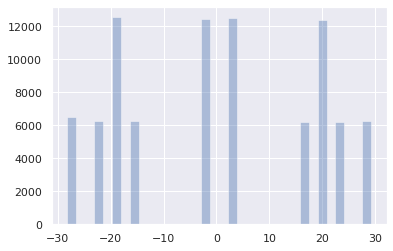

In [54]:
sns.distplot(shoe_mean_diff_shuffle, kde = False)

#Effect size

In [55]:
#find % increase in sales

(np.mean(sales_2) - np.mean(sales_1))/np.mean(sales_1) *100

4.441846873173592